In [ ]:
# CNN Classroom Exercise: Image Classification with CIFAR-10
# Objective: Practice building, training, and evaluating a CNN using TensorFlow/Keras
# Environment: Google Colab with GPU
# Dataset: CIFAR-10 (10 classes of 32x32 color images)

# Step 1: Import Libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Step 2: Load and Preprocess CIFAR-10 Dataset
# CIFAR-10 contains 60,000 32x32 color images in 10 classes (e.g., airplane, cat, dog)
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to range [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

# 資料增強
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=10, #旋轉±10
    width_shift_range=0.05, #水平平移
    height_shift_range=0.05, #垂直平移
    horizontal_flip=True, #水平翻轉
    zoom_range=0.05 #縮放圖片
)
datagen.fit(train_images)

# Define class names for visualization
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

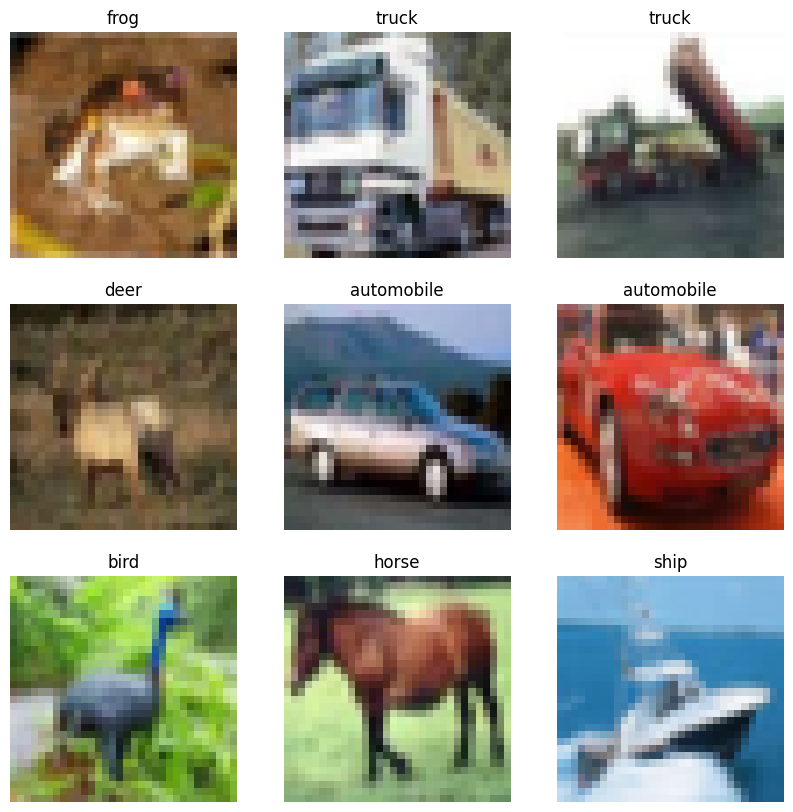

In [ ]:
# Step 3: Visualize Sample Data
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(train_images[i])
    plt.title(class_names[train_labels[i][0]])
    plt.axis('off')
plt.show()

In [ ]:
# Step 4: Build the CNN Model (Task 要調整的部分)
model = models.Sequential([
    # 一個layers.Conv2D表一層2維卷積層，而裡面數值分別為(濾波器數量, 核大小/濾波器大小, 激發函數, 輸入大小-3表示彩色, 是否補0)，輸入大小的參數只需要第一層輸入即可
    # Convolutional Layer 1
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.1),
    # Convolutional Layer 2
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.15),
    # Convolutional Layer 3
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.Dropout(0.2),

    # Flatten the output for dense layers
    layers.GlobalAveragePooling2D(),

    # Dense Layer: 64 units
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),

    # Output Layer: 10 units (one per class) with softmax
    layers.Dense(10, activation='softmax')
])
# Display model summary
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,256,330 (4.79 MB)

 Trainable params: 1,254,666 (4.79 MB)

 Non-trainable params: 1,664 (6.50 KB)

In [ ]:
# Step 5: Compile the Model
from tensorflow.keras.optimizers import AdamW
model.compile(optimizer=AdamW(learning_rate=0.0005),
       loss='sparse_categorical_crossentropy',
       metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-6,
    verbose=1
)
early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=7,
    restore_best_weights=True,
    verbose=1
)

In [ ]:
# Step 6: Train the Model
history = model.fit(datagen.flow(train_images, train_labels, batch_size=64), epochs=40, steps_per_epoch=len(train_images) // 32,
                    validation_data=(test_images, test_labels), callbacks=[reduce_lr, early_stop])

Epoch 1/40
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 54s 27ms/step - accuracy: 0.4425 - loss: 1.5239 - val_accuracy: 0.5145 - val_loss: 1.6684 - learning_rate: 5.0000e-04
Epoch 2/40
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 69s 23ms/step - accuracy: 0.6517 - loss: 0.9799 - val_accuracy: 0.6395 - val_loss: 1.0845 - learning_rate: 5.0000e-04
Epoch 3/40
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 43s 24ms/step - accuracy: 0.7237 - loss: 0.7855 - val_accuracy: 0.6741 - val_loss: 0.9912 - learning_rate: 5.0000e-04
Epoch 4/40
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 0.7611 - loss: 0.6848 - val_accuracy: 0.7446 - val_loss: 0.7529 - learning_rate: 5.0000e-04
Epoch 5/40
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 0.7873 - loss: 0.6169 - val_accuracy: 0.7392 - val_loss: 0.8128 - learning_rate: 5.0000e-04
Epoch 6/40
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 0.8048 - loss: 0.5663 - val_accuracy: 0.7116 - val_loss: 0.9001 - learning_rate: 5.0000e-04
Epoch 7/40
 782/1562 ━━━━━━━━━━━━━━━━━━━

In [ ]:
# Step 7: Evaluate the Model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nTest accuracy: {test_acc:.4f}")


313/313 - 1s - 4ms/step - accuracy: 0.8962 - loss: 0.3523

Test accuracy: 0.8962


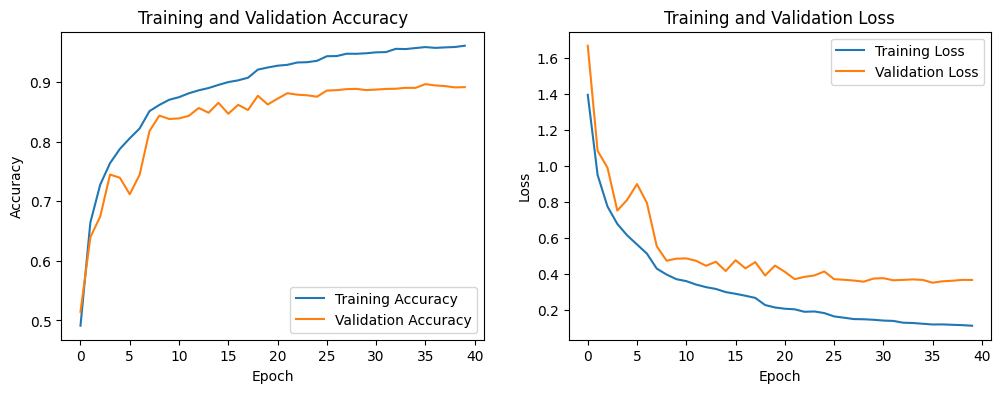

In [ ]:

# Step 8: Plot Training and Validation Accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
# Step 9: Make Predictions
predictions = model.predict(test_images[:5])
for i in range(5):
    predicted_label = class_names[np.argmax(predictions[i])]
    true_label = class_names[test_labels[i][0]]
    print(f"Image {i+1}: Predicted: {predicted_label}, True: {true_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 588ms/step
Image 1: Predicted: cat, True: cat
Image 2: Predicted: ship, True: ship
Image 3: Predicted: ship, True: ship
Image 4: Predicted: airplane, True: airplane
Image 5: Predicted: frog, True: frog


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


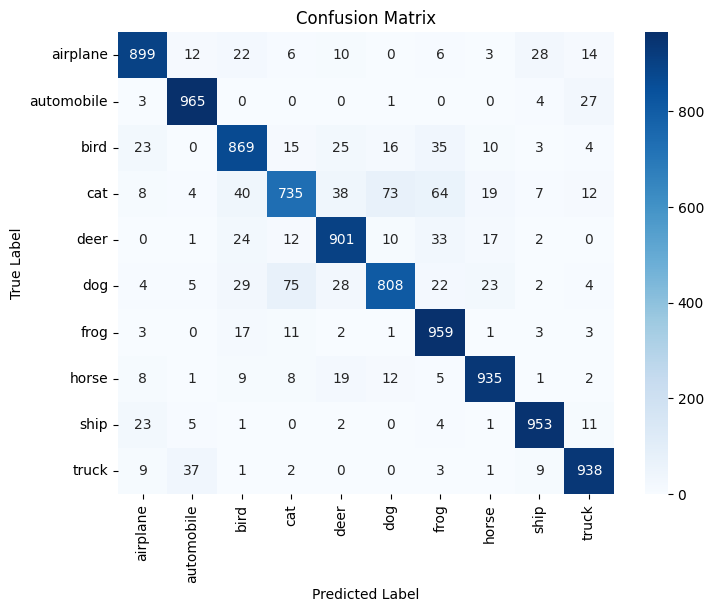

In [ ]:
# 混淆矩陣
y_pred_prob = model.predict(test_images)
y_pred = y_pred_prob.argmax(axis=1)

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(test_labels, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Step 10: Save Model Performance for Autograding
# This cell saves the model performance to a text file for GitHub Actions
try:
    # Get final training accuracy
    final_train_acc = history.history['accuracy'][-1]
    final_val_acc = history.history['val_accuracy'][-1]
    final_train_loss = history.history['loss'][-1]
    final_val_loss = history.history['val_loss'][-1]

    # Create performance summary
    performance_text = f"""Model Performance Summary:
Test Accuracy: {test_acc:.4f}
Test Loss: {test_loss:.4f}
Final Training Accuracy: {final_train_acc:.4f}
Final Validation Accuracy: {final_val_acc:.4f}
Final Training Loss: {final_train_loss:.4f}
Final Validation Loss: {final_val_loss:.4f}
Training Epochs: {len(history.history['accuracy'])}
Model Parameters: {model.count_params()}"""

    # Save to file for GitHub Actions
    with open('model_accuracy.txt', 'w') as f:
        f.write(performance_text)

    print("Model performance saved to model_accuracy.txt")
    print(performance_text)

except Exception as e:
    print(f"Error saving model performance: {e}")
    # Create a basic file even if there's an error
    with open('model_accuracy.txt', 'w') as f:
        f.write(f"Model execution completed with errors: {e}")

Model performance saved to model_accuracy.txt
Model Performance Summary:
Test Accuracy: 0.8962
Test Loss: 0.3523
Final Training Accuracy: 0.9606
Final Validation Accuracy: 0.8912
Final Training Loss: 0.1135
Final Validation Loss: 0.3677
Training Epochs: 40
Model Parameters: 1256330


# Task 5: Report
<font size="5px"> 一、前言</font><br>
- 實驗資料集：CIFAR-10
  -  為一個廣泛使用的圖像資料集，具有60,000張彩色圖片(32x32 pixels, RGB)，平均分成10種不同類別。
  - 資料集被分成50,000張training圖片和10,000張test圖片。
- 實驗模型：CNN
  - 常用於影像辨識，能簡化神經網路的結構。
- 根據作業原始程式碼，可知初始設定與結果如下：
  - 設定
  ```python
  # 建立具有3層濾波器的CMM模型
  model = models.Sequential([
      layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
      layers.MaxPooling2D((2, 2)),
      layers.Conv2D(64, (3, 3), activation='relu'),
      layers.MaxPooling2D((2, 2)),
      layers.Conv2D(64, (3, 3), activation='relu'),
      layers.Flatten(),
      layers.Dense(64, activation='relu'),
      layers.Dense(10, activation='softmax')
  ])
  # 設定模型訓練方式
  model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  # 訓練模型
  history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))
  ```
  - 結果 (簡報上的數據)
  ```
  Model Performance Summary:
  Test Accuracy: 0.7202
  Test Loss: 0.8437
  Final Training Accuracy: 0.7866
  Final Validation Accuracy: 0.7202
  Final Training Loss: 0.6038
  Final Validation Loss: 0.8437
  Training Epochs: 10
  Model Parameters: 122570
  ```
- 作業目標
  1. 須完成5個Task，通過6個pass。
  2. 主要評分的部分：**Test Accuracy**, **Test Loss**。

<font size="5px"> 二、實驗過程</font><br>
- 實驗設計
  - 以目前的作業基底而言，Test Accuracy=0.7202已經是一個還不錯的模型，故選擇從Task 2的model.compile開始調整，再去加深模型層數、訓練回合數、資料增強等。
  - 設計流程：模型訓練方式 ==> 模型設計 ==> 資料增強 ==> 模型訓練。
1. 未進行調整
  - 結果<br>
  該數值雖比簡報的數值差，但經反覆測試發現，Test Accuracy會落在0.70-0.73之間。
  ```
  Model Performance Summary:
  Test Accuracy: 0.7179
  Test Loss: 0.8572
  Final Training Accuracy: 0.7886
  Final Validation Accuracy: 0.7179
  Final Training Loss: 0.6021
  Final Validation Loss: 0.8572
  Training Epochs: 10
  Model Parameters: 122570
  ```
2. 調整模型訓練方式
  - 損失函數<br>
    挑選`sparse_categorical_crossentropy`，因為此實驗是進行多類別的分類，且標籤為整數(0～9)。
  - 優化器<br>
    選擇SGD、SGD+Momentum、RMSprop以及和Adam類似的AdamW、Nadam，與原先設定之Adam`(Test Accuracy=0.7179)`進行比較。
    - SGD結果
    ```
    Model Performance Summary:
    Test Accuracy: 0.6271
    Test Loss: 1.0514
    Final Training Accuracy: 0.6456
    Final Validation Accuracy: 0.6271
    Final Training Loss: 1.0093
    Final Validation Loss: 1.0514
    Training Epochs: 10
    Model Parameters: 122570
    ```
    - SGD+Momentum結果 (learning_rate=0.03, momentum=0.05)
    ```
    Model Performance Summary:
    Test Accuracy: 0.6665
    Test Loss: 1.4109
    Final Training Accuracy: 0.8779
    Final Validation Accuracy: 0.6665
    Final Training Loss: 0.3465
    Final Validation Loss: 1.4109
    Training Epochs: 10
    Model Parameters: 122570
    ```
    - RMSprop結果
    ```
    Model Performance Summary:
    Test Accuracy: 0.7079
    Test Loss: 0.9343
    Final Training Accuracy: 0.8076
    Final Validation Accuracy: 0.7079
    Final Training Loss: 0.5578
    Final Validation Loss: 0.9343
    Training Epochs: 10
    Model Parameters: 122570
    ```
    - AdamW結果
    ```
    Model Performance Summary:
    Test Accuracy: 0.7112
    Test Loss: 0.8826
    Final Training Accuracy: 0.7860
    Final Validation Accuracy: 0.7112
    Final Training Loss: 0.6040
    Final Validation Loss: 0.8826
    Training Epochs: 10
    Model Parameters: 122570
    ```
    - Nadam結果
    ```
    Model Performance Summary:
    Test Accuracy: 0.7191
    Test Loss: 0.8438
    Final Training Accuracy: 0.8064
    Final Validation Accuracy: 0.7191
    Final Training Loss: 0.5484
    Final Validation Loss: 0.8438
    Training Epochs: 10
    Model Parameters: 122570
    ```
    - 小結論<br>
    除了SGD的結果不太理想，其他優化器得出的數值在重複測試之後皆相近，故以其設計性質選擇`AdamW`，該優化器能夠避免過擬合，穩定收斂且具有較佳的泛化能力。
    - 小發現<br>
      - 每次執行結果不一定一樣，數值會接近。和非監督的感覺有點像。
      - model.compile的優化器可以用引號+小寫直接呼叫預設數值運作(learning rate=0.001等)，也可以另外引用優化器，使用具有大寫的類別進行細節設定。引號的方式，有限定用小寫字母，但在colab測試時包含大寫亦能正常運作，不確定其他環境或版本是否有影響。
  - 學習率<br>
    - 測試0.01, 0.001, 0.0005, 0.0001<br>
    發現在固定epoch=10情況下，0.001和0.0005所得結果較佳，0.01和0.0001均會使Test Accuracy結果下滑，但0.0001的training和validation的圖形走向較貼合，未有明顯上升，故選擇0.0005，為初始學習率。
3. 調整模型設計<br>
  - 加深模型深度
    - 需要計算輸入圖形大小與縮小比例，以免過度化簡變得太小(1*1)，會無法往下進行Conv2D或pooling，產生錯誤。例如：使用過多次Maxpooling。
    - 增加特徵數量
      - 增加多層Conv2D，且使用較多的filter。
      - 在Conv2D加上padding='same'，當filter超出圖片大小時，會自動補0。
    - 新增layers.BatchNormalization()，使穩定訓練、加速收斂。
    - 新增layers.Dropout()，防止過擬合、提升泛化能力。
  - 將layers.Flatten()改為layers.GlobalAveragePooling2D()，降低過擬合機率，並提升泛化能力。
4. 資料增強<br>
  - 使用指定的ImageDataGenerator對資料進行微調增強。
  - 在model.fit使用的datagen.flow()可以：
    1. 每個batch中隨機套用旋轉、平移、翻轉等增強 (每個batch中有64張增強後的圖片)
    2. 每次epoch都生成不一樣的變形資料
    3. 不會改變原始x_train的值
  - 疑問點
    - 為什麼加上data_augmentation之後，原本在model.compile可以看到的數值輸出資訊都變成了「?」還有「0」?<br>
    改成要求的格式，使用舊版資料增強的方式，作用於資料上而非加入成模型參數，變正常顯示。可能新版資料增強會影響呈現數值。
    ```python
    # 原本寫的
    data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),  # 左右翻轉
    layers.RandomRotation(0.1),       # 隨機旋轉 ±10%
    layers.RandomZoom(0.1),           # 隨機縮放 ±10%
    layers.RandomTranslation(0.1, 0.1), # 水平、垂直平移 ±10%
    layers.RandomContrast(0.1)        # 對比度調整
    ])
    ```
5. 模型訓練<br>
  - 新增ReduceLROnPlateau，使learning rate在val_loss數次沒有改善時，降低數值。
  - 新增EarlyStopping，紀錄最佳val_accuracy，並且在val_accuracy數次沒有變更好結果時，停止訓練，避免浪費子資源。
  - 因為learning rate會不停變動，加上考量訓練結果與時間，選擇epoch=40讓模型能有訓練更完整。
- 視覺化<br>
  保留原先就有的training和testing每一迭代的結果圖，新增混淆矩陣。

<font size="5px"> 三、總結</font><br>
- 最終結果
  ```
  Model Performance Summary:
  Test Accuracy: 0.8962
  Test Loss: 0.3523
  Final Training Accuracy: 0.9606
  Final Validation Accuracy: 0.8912
  Final Training Loss: 0.1135
  Final Validation Loss: 0.3677
  Training Epochs: 40
  Model Parameters: 1256330
  ```
- 結論<br>
 基於原始模型，在訓練模型挑選優化器方面沒有特別突出的數據，只能依據查找資料選擇其中一種使用。<br>
 而模型調整與資料增強的部分，則是憑藉資料與自行摸索調整去設定數量。最高只有將Test Accuracy達到0.86，遲遲無法上升。<br>
 最後，使用ReduceLROnPlateau讓learning rate自己變動微調，有效提升訓練成果，再搭配EarlyStopping紀錄最佳歷史資料，最佳結果不會因為後續訓練而蓋過不見，可以忠實呈現出來。
